## Importing the libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Importing the dataset

In [ ]:
df = pd.read_csv("comcast_consumeraffairs_complaints.csv")

In [ ]:
df

,author,posted_on,rating,text
0,"Alantae of Chesterfeild, MI","Nov. 22, 2016",1,I used to love Comcast. Until all these consta...
1,"Vera of Philadelphia, PA","Nov. 19, 2016",1,I'm so over Comcast! The worst internet provid...
2,"Sarah of Rancho Cordova, CA","Nov. 17, 2016",1,If I could give them a negative star or no sta...
3,"Dennis of Manchester, NH","Nov. 16, 2016",1,I've had the worst experiences so far since in...
4,"Ryan of Bellevue, WA","Nov. 14, 2016",1,Check your contract when you sign up for Comca...
...,...,...,...,...
5654,"Brandye of San Ramon, CA","March 12, 2006",0,"Last year, we bought the Nascar In Car package..."
5655,"Paul of Chicago, IL","March 12, 2006",0,Their billing department is horrid. If you dec...
5656,"Autumn of Knoxville, TN","March 6, 2006",0,"Ordered ""On Demand"" movie for the 1st time in ..."
5657,"Tina of Villa Rica, GA","Feb. 22, 2006",0,I am being ripped of by Comcast Cable regardin...


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5659 entries, 0 to 5658
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   author     5659 non-null   object
 1   posted_on  5659 non-null   object
 2   rating     5659 non-null   int64 
 3   text       5629 non-null   object
dtypes: int64(1), object(3)
memory usage: 177.0+ KB


In [ ]:
df.describe()

,rating
count,5659.000000
mean,0.822053
std,0.669991
min,0.000000
25%,0.000000
50%,1.000000
75%,1.000000
max,5.000000


In [ ]:
df.isnull().sum()

author        0
posted_on     0
rating        0
text         30
dtype: int64

In [ ]:
df.dropna(subset=['text'], inplace=True)

In [ ]:
df.isnull().sum()

author       0
posted_on    0
rating       0
text         0
dtype: int64

In [ ]:
df['rating'].unique()

array([1, 2, 5, 3, 4, 0])

## Cleaning the texts

In [ ]:
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
corpus = []
for i in range(0, 1000):
  review = re.sub('[^a-zA-Z]', ' ', df['text'][i])
  review = review.lower()
  review = review.split()
  ps = PorterStemmer()
  all_stopwords = stopwords.words('english')
  all_stopwords.remove('not')
  review = [ps.stem(word) for word in review if not word in set(all_stopwords)]
  review = ' '.join(review)
  corpus.append(review)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
print(corpus)

['use love comcast constant updat internet cabl crash lot night sometim day channel even work demand sometim play either wish someth min ago internet crash min reason tire think switch wow someth pleas not get xfiniti', 'comcast worst internet provid take onlin class multipl time late assign power interrupt area lead poor qualiti internet servic definit switch verizon rather pay extra deal w comcast non stop internet problem', 'could give neg star star review would never work industri bad custom servic comcast not matter money make well enough beyond afford servic legitim ripoff think biggest scam sinc mortgag industri major meltdown hope move somewher comcast not exist disregard want help right thing honestli astound call issu bill connect servic ad remov servic error not matter transfer minimum time everyon say thing pass issu next person one resolv problem offer promot packag small timefram never access upgrad without wish chang bill month overcharg month sinc start blatant rude mus

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
cv = TfidfVectorizer(max_features=6000)
X = cv.fit_transform(corpus).toarray()

## Using the elbow method to find the optimal number of clusters

In [ ]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

## Training the K-Means model on the dataset

In [ ]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


## Visualising the clusters

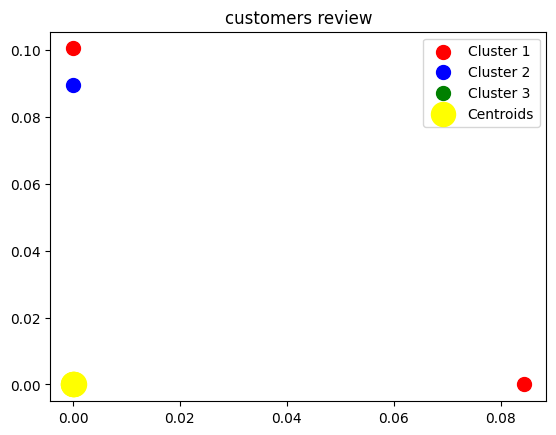

In [ ]:
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('customers review')
plt.legend()
plt.show()